# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [67]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns

plt.style.use('classic')
sns.set()

## load the data sets

In [3]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [4]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [5]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

<AxesSubplot:xlabel='country'>

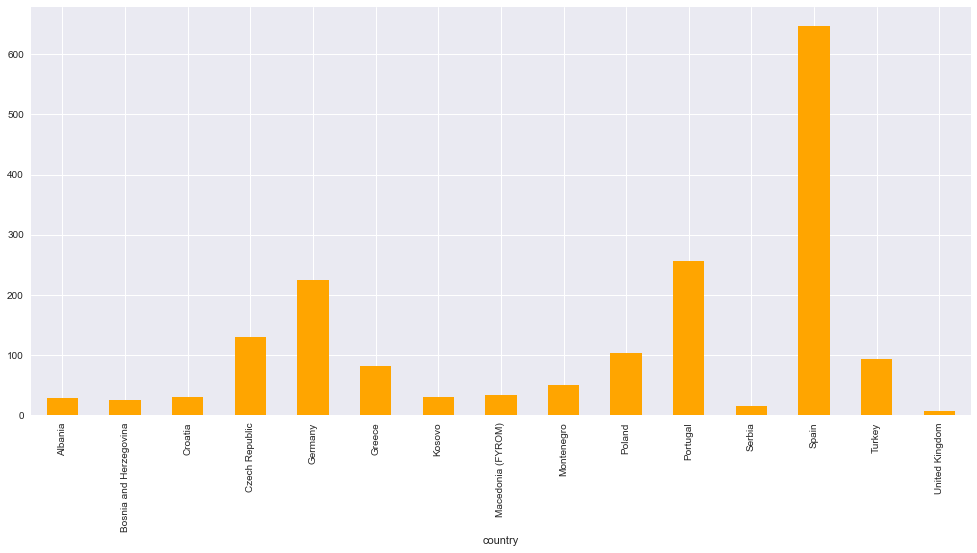

In [42]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim
df.groupby('country')['city'].count().plot(kind='bar', figsize=(15, 7))
#sns.barplot(x='country', y='count', data=df.groupby('country')['city'].count())

Now you try: re-create the plot above, but make the bars orange with maroon edges.

<AxesSubplot:>

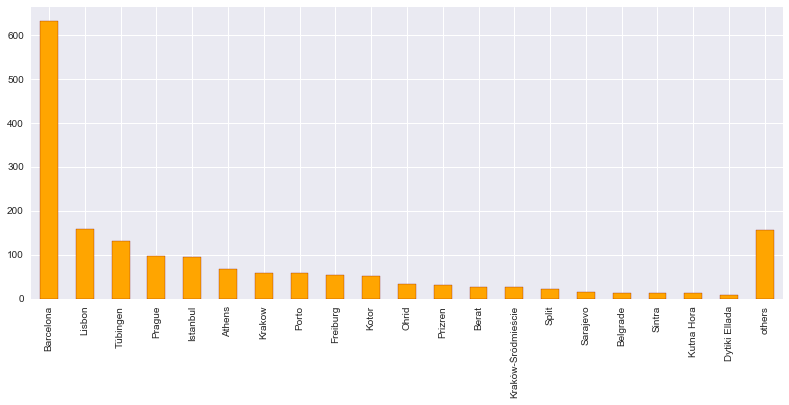

In [45]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

#df_cities = df.groupby('city').filter(lambda x: len(x) > 50)
#df_cities = df_cities.groupby('city')['lat'].count().reset_index(name='count').sort_values(by='count', ascending=False)

cities = df['city'].value_counts()
top20cities = cities.sort_values(ascending=False)[:20].copy()
top20cities['others'] = cities.sort_values(ascending=False)[20:].sum()
top20cities.plot(kind='bar', x='city', color='orange', edgecolor='maroon', figsize=(12, 5))

## Next: scatter plots as simple maps

(-10.0, 30.0)

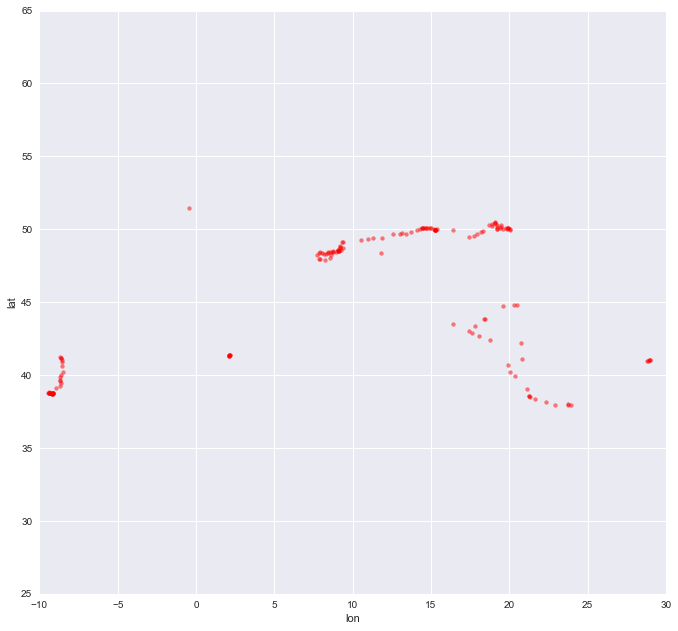

In [48]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings.
plt.style.use('seaborn-bright')
q3plot = rs.plot.scatter(x='lon', y='lat', alpha=.5, s=15, color='r', figsize=(10,10))
q3plot.set_ylim(25,65)
q3plot.set_xlim(-10,30)

## Line charts, with annotation

In [9]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

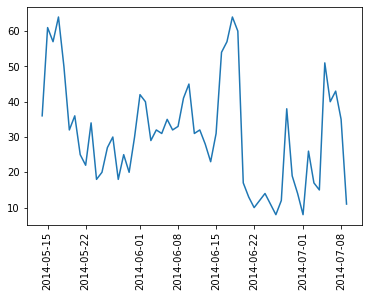

In [10]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings.
#plt.plot(countdata)
lp = sns.lineplot(data=countdata)
for l in lp.get_xticklabels():
    l.set_rotation(90)

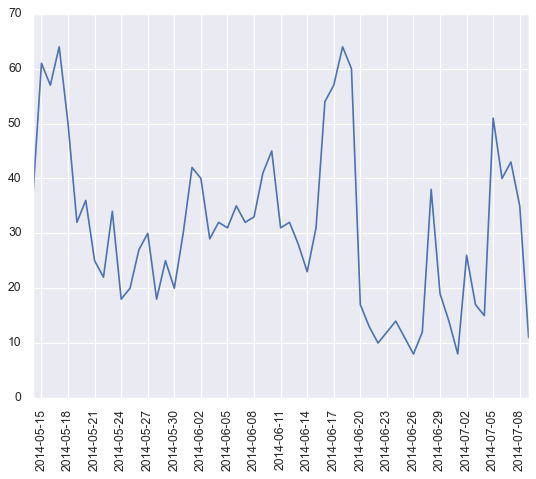

In [102]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib
#from scipy.interpolate import interp1d
#years_as_list = [100*x.month + x.day for x in list(countdata.index.values)]
#smooth = interp1d(years_as_list, list(countdata.values), kind='cubic')
#plt.plot(countdata, 'o')
#q5plot = plt.plot(countdata.index.values, smooth(years_as_list))

q5plot = countdata.plot()
label_date_range = pd.date_range(start='2014-05-15', end='2014-07-08', freq='3D')
q5plot.set_xticks(label_date_range)
q5plot.set_xticklabels(label_date_range, rotation=90)
q5plot.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

## Pie charts

In [12]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

Text(0.5, 0, '')

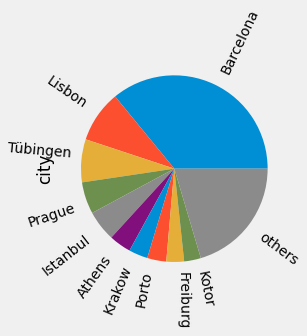

In [26]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.
plt.style.use('fivethirtyeight')
top10cities = cities.sort_values(ascending=False)[:10].copy()
top10cities['others'] = cities.sort_values(ascending=False)[10:].sum()
plot = top10cities.plot.pie(rotatelabels=True)
plot.set_xlabel('')